# EPSY 5122: Programming for Social Science Researchers
## Week 11
### Thursday, November 18, 2021

In [2]:
import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
mov = pd.read_csv('in_data/tmdb_5000_movies.csv')

In [4]:
mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Challenge 1**: *Find the descriptive stats for each numeric column.*

In [16]:
# challenge 1 code here
mov[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Challenge 2**: *: Find which columns have missing data (and how many missing data)*

In [11]:
# challenge 2 code here
mov.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [19]:
mov2 = mov.drop(['homepage', 'tagline'], axis=1)

In [20]:
mov2.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [22]:
mov3 = mov2.dropna().reset_index(drop=True)

In [24]:
mov3[['revenue']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
revenue,4799.0,8.232920e+07,1.629076e+08,0.0,0.0,19184015.0,92956519.0,2.787965e+09


In [29]:
mov3[['revenue', 'budget', 'title']]

,revenue,budget,title
0,2787965087,237000000,Avatar
1,961000000,300000000,Pirates of the Caribbean: At World's End
2,880674609,245000000,Spectre
3,1084939099,250000000,The Dark Knight Rises
4,284139100,260000000,John Carter
...,...,...,...
4794,2040920,220000,El Mariachi
4795,0,9000,Newlyweds
4796,0,0,"Signed, Sealed, Delivered"
4797,0,0,Shanghai Calling


In [43]:
mov4 = mov3[(mov3.budget>0) & (mov3.revenue>500)]

In [32]:
mov4.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,110.724373,6.309353,977.287395
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,20.965694,0.873891,1414.309577
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [59]:
mov4.sort_values(by='budget').head(n=50)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4236,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1936-02-05,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Modern Times,8.1,856
3136,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-09-28,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Nurse 3-D,4.9,119
4578,218,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...",1435,"[{""id"": 222, ""name"": ""schizophrenia""}, {""id"": ...",en,Tarnation,Filmmaker Jonathan Caouette's documentary on g...,1.063439,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-10-19,1162014,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tarnation,7.5,22
4792,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Primer,6.9,658
4692,8000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",79120,"[{""id"": 237, ""name"": ""gay""}, {""id"": 1025, ""nam...",en,Weekend,After a drunken house party with his straight ...,1.041254,"[{""name"": ""EM Media"", ""id"": 1917}, {""name"": ""T...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2011-09-22,469947,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Weekend,7.4,163
4720,10000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",985,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1852, ""n...",en,Eraserhead,Henry Spencer tries to survive his industrial ...,20.399578,"[{""name"": ""American Film Institute (AFI)"", ""id...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-03-19,7000000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Eraserhead,7.5,485
4784,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pink Flamingos,6.2,110
4573,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-09-14,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Paranormal Activity,5.9,1316
4788,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Cure,7.4,63
47

<AxesSubplot:xlabel='budget', ylabel='revenue'>

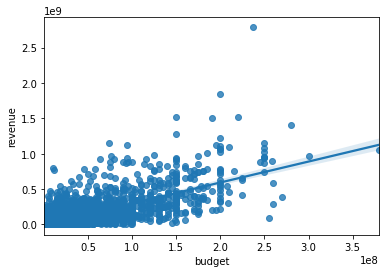

In [47]:
sns.regplot(x=mov4.budget, y=mov4.revenue)

In [55]:
lm = smf.ols(formula = "revenue ~ budget", data = mov4).fit()

In [56]:
lm.params

Intercept    995962.816013
budget            2.959294
dtype: float64

In [57]:
lm.conf_int()

,0,1
Intercept,-5.221895e+06,7.213820e+06
budget,2.856231e+00,3.062356e+00


In [62]:
preds = pd.DataFrame({'budget': [10000, 20000]})
preds

,budget
0,10000
1,20000


In [63]:
lm.predict(preds)

0    1.025556e+06
1    1.055149e+06
dtype: float64

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3170.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:02:14   Log-Likelihood:                -64665.
No. Observations:                3214   AIC:                         1.293e+05
Df Residuals:                    3212   BIC:                         1.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.96e+05   3.17e+06      0.314      0.753   -5.22e+06    7.21e+06
budget         2.9593      0.053     56.299      0.000       2.856       3.062
==============================================================================
Omnibus:                     2511.953   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127255.576
Skew:                           3.269   Prob(JB):                         0.00
Kurtosis:                      33.125   Cond. No.                     8.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
summary(lm)

NameError: name 'summary' is not defined

In [67]:
lm_table = pd.DataFrame({'estimate': lm.params, 'lowCI': lm.conf_int()[0], 'highCI': lm.conf_int()[1]})
lm_table

,estimate,lowCI,highCI
Intercept,995962.816013,-5.221895e+06,7.213820e+06
budget,2.959294,2.856231e+00,3.062356e+00
